In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_flight = pd.read_csv("Customer Flight Activity.csv")    #no utilizo index_col = 0 porque loyalty number sino pasaria a ser el indice

In [3]:
df_loyalty = pd.read_csv("Customer Loyalty History.csv")

Fase 1: Exploración y Limpieza "Customer Flight Activity.csv"

 . Exploración Inicial de df_flight. En el que voy a analizar a fondo mi df

In [4]:
df_flight

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [5]:
df_flight.head()  #primeras filas

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [6]:
df_flight.sample(15)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
365614,669028,2018,10,13,4,17,1700,170.0,0,0
309670,392402,2018,7,15,7,22,3212,321.0,0,0
358710,302804,2018,10,0,0,0,0,0.0,0,0
252347,553973,2017,9,9,2,11,2420,242.0,606,49
85162,135382,2017,6,10,0,10,2480,248.0,0,0
402341,824259,2018,12,8,0,8,1224,122.0,0,0
316023,727497,2018,7,0,0,0,0,0.0,0,0
301190,836706,2018,6,0,0,0,0,0.0,0,0
315631,707276,2018,7,0,0,0,0,0.0,0,0
165487,810621,2017,10,13,0,13,2951,295.0,0,0


In [7]:
df_flight.shape #Devuelve el número de filas y columnas. tamaño

(405624, 10)

In [8]:
#Proporciona información general del DataFrame, incluyendo tipos de datos y valores nulos. # Obtener información general del DataFrame

df_flight.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [9]:
# Verificar valores nulos en cada columna a partir del método .isnull().sum()


df_flight.isnull().sum()



Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [10]:
# Verificar cantidad de valores únicos por columna, devuelve el número de valores únicos en una columna o df, es decir, la cantidad de valores diferentes sin contar los repetidos.

df_flight.nunique()


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

In [11]:
#es un atajo para transponer el DataFrame o Series. Esto significa que convierte las filas en columnas y las columnas en filas. 
                        
df_flight.describe().T

#Usar .T en Pandas transpone el resultado de describe(), convirtiendo las estadísticas en columnas y las variables en filas, 
#lo que facilita la comparación de las estadísticas entre columnas. 
#Es útil cuando hay muchas columnas, ya que mejora la visualización y organización de los datos.

#No pongo (include='object'), generalmente ocurre cuando no hay columnas de tipo objeto (categóricas) en tu DataFrame

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


Fase 1: Exploración y Limpieza "Customer Loyalty History.csv"

 . Exploración Inicial de df_flight. En el que voy a analizar a fondo mi df

In [12]:
df_loyalty

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [13]:
df_loyalty.head()  #primeras filas

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [14]:
df_loyalty.sample(15)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
8063,833754,Canada,Saskatchewan,Regina,S6J 3G0,Male,College,NaN,Divorced,Nova,8273.11,Standard,2018,6,NaN,NaN
1165,324801,Canada,Quebec,Montreal,H2Y 2W2,Male,Bachelor,55040.0,Single,Aurora,5420.36,Standard,2014,7,NaN,NaN
16330,365887,Canada,Ontario,Toronto,P5S 6R4,Male,College,NaN,Married,Star,18948.35,Standard,2018,5,NaN,NaN
7692,369603,Canada,Nova Scotia,Halifax,B3C 2M8,Male,Bachelor,70524.0,Married,Nova,7529.86,Standard,2013,9,NaN,NaN
3653,884570,Canada,Quebec,Tremblant,H5Y 2S9,Female,Bachelor,58509.0,Married,Aurora,15956.03,Standard,2016,5,2017.0,1.0
10343,953927,Canada,Manitoba,Winnipeg,R6Y 4T5,Female,College,NaN,Single,Star,2397.54,Standard,2017,12,2018.0,8.0
15957,611817,Canada,Ontario,Toronto,P1J 8T7,Female,College,NaN,Single,Star,13197.93,Standard,2016,2,NaN,NaN
2238,982542,Canada,Quebec,Tremblant,H5Y 2S9,Male,Bachelor,71908.0,Married,Aurora,7693.12,Standard,2013,6,2017.0,8.0
828,493427,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,97547.0,Married,Aurora,5067.00,Standard,2015,7,NaN,NaN
15863,945133,Canada,British Columbia,Victoria,V10 6T5,Female,High School or Below,54033.0,Single,Star,12298.69,Standard,2012,5,NaN,NaN


In [15]:
df_loyalty.shape #Devuelve el número de filas y columnas. tamaño

(16737, 16)

In [16]:
#Proporciona información general del DataFrame, incluyendo tipos de datos y valores nulos. # Obtener información general del DataFrame

df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [17]:
# Verificar valores nulos en cada columna a partir del método .isnull().sum()

df_loyalty.isnull().sum()


Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [18]:
# Verificar cantidad de valores únicos por columna, devuelve el número de valores únicos en una columna o df, es decir, la cantidad de valores diferentes sin contar los repetidos.

df_loyalty.nunique()

Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64

In [19]:
#es un atajo para transponer el DataFrame o Series. Esto significa que convierte las filas en columnas y las columnas en filas. 
                        
df_loyalty.describe().T

#Usar .T en Pandas transpone el resultado de describe(), convirtiendo las estadísticas en columnas y las variables en filas, 
#lo que facilita la comparación de las estadísticas entre columnas. 
#Es útil cuando hay muchas columnas, ya que mejora la visualización y organización de los datos.

#No pongo (include='object'), generalmente ocurre cuando no hay columnas de tipo objeto (categóricas) en tu DataFrame

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [20]:
df_loyalty.duplicated().sum() #Cuenta las filas duplicadas en el DataFrame.

0

En el df_flight habia duplicados por lo que voy a gestionar que hago con ellos antes de hacer la union de los dos df.

In [21]:
#Ver los duplicados

df_flight.duplicated().sum() #Cuenta las filas duplicadas en el DataFrame.

1864

In [22]:
#Creo una variable para mostrar cuales son los duplicados al printear

duplicated = df_flight[df_flight.duplicated()]

duplicated

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [23]:
#Borro las filas duplicadas. Uso keep='first' para eliminar duplicados en el DataFrame conservando solo la primera aparición de cada registro, 
#ya que generalmente la primera entrada es la más relevante o correcta.

df_flight_not_duplicated = df_flight.drop_duplicates(keep='first')

In [24]:
#Verifico que no hay duplicados

df_flight_not_duplicated.duplicated().sum()

0

Unión los dos datos de los DataFrame de la forma más eficiente

In [25]:
df_merged = pd.merge(df_flight, df_loyalty, on='Loyalty Number', how='outer')

In [26]:
df_merged

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999986,2018,7,15,0,15,1995,199.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405620,999986,2018,9,0,0,0,0,0.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405621,999986,2018,10,6,0,6,708,70.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405622,999986,2018,11,11,4,15,2040,204.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


Usamos outer en lugar de inner para no perder clientes que solo están en uno de los DataFrames. outer conserva todos registros, llenando con NaN donde falten datos, mientras que inner eliminaría registros sin coincidencia en ambas tablas.  Esto nos da una visión completa de todos los clientes

2 . Limpieza de Datos:

In [27]:
# Mostrar cantidad de valores nulos antes de tratarlos

df_merged.isnull().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

In [28]:
# Mostrar los valores únicos en la columna "Cancellation Year"

df_merged["Cancellation Year"].unique()
                

array([  nan, 2018., 2015., 2016., 2014., 2017., 2013.])

In [ ]:
# Mostrar los valores únicos en la columna "Cancellation Month"

df_merged["Cancellation Month"].unique()filtrar codigodescript

array([nan,  3.,  8.,  6.,  9.,  2.,  7., 10.,  1.,  4., 12., 11.,  5.])

In [30]:
#Decido hacer un porcentaje para ver que voy a hacer tantos nulos

porcentaje_nulos = df_merged['Cancellation Year'].isnull().mean() * 100

porcentaje_nulos

87.65753505709722

In [31]:
#Decido hacer un porcentaje para ver que voy a hacer tantos nulos

porcentaje_nulos_1 = df_merged['Cancellation Month'].isnull().mean() * 100

porcentaje_nulos_1

87.65753505709722

He comprobado el tipo de dato y por eso he modificado por cero. Como salario tiene tipo float no puedo poner Unknone.

Puedo observar que en las columnas 'Cancellation Year' y 'Cancellation Month' hay muchos NaN y decido cambiarlos por 0, porque significa que el cliente nunca canceló. Y así no lo dejo vacío.

Además, en la columna 'Salary' también los cambio por 0. No voy a poner Unknone porque sino seria un object y Salary es un float

Como he comprobado el tipo de dato, y el tipo de dato decido modificar por cero

inplace=True para hacerlo directamente en el data Frame 


In [32]:
# Rellenar valores nulos en columnas clave con valores adecuados

df_merged.fillna({"Salary": 0, "Cancellation Year": 0, "Cancellation Month": 0}, inplace=True)



In [33]:
#Verifico los nulos

df_merged.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
dtype: int64

Utilizo .fillna() porque nos permite mantener todos los registros sin perder clientes. No utilizo .dropna() porque perdería información importante.

Verifica la consistencia y corrección de los datos

In [34]:
df_merged

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
1,100018,2017,2,2,2,4,1320,132.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
2,100018,2018,10,6,4,10,3110,311.0,385,31,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
3,100018,2017,4,4,0,4,924,92.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
4,100018,2017,5,0,0,0,0,0.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999986,2018,7,15,0,15,1995,199.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,0.0,0.0
405620,999986,2018,9,0,0,0,0,0.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,0.0,0.0
405621,999986,2018,10,6,0,6,708,70.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,0.0,0.0
405622,999986,2018,11,11,4,15,2040,204.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,0.0,0.0


Voy a realizar un .describe()T para detectar valores atípicos o errores, como los valores negativos.

In [35]:
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00


Puedo observar que en la columna 'Salary' tenemos datos que están en negativo, podría indicar un error en la recolección de los datos, ya que no tendría sentido que los salarios sean negativos. Esto requiere una revisión y corrección, como la eliminación de esos valores negativos o su ajuste a valores válidos. Decido cambiarlos a positivo.

In [36]:
#Quiero sustituir los negativos pero no puedo con el replace porque solo puedo utilizarlo para cadenas de texto o reemplazos puntuales (no da error, pero no hace el cambio). 
#Por lo que uso el abs(), lo que hace que todos los números negativos se conviertan en positivos directamente.

df_merged["Salary"] = df_merged["Salary"].abs()

In [37]:
#Verificar tipos de datos

df_merged.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object

In [38]:
df_merged.duplicated().sum() 

1864

In [39]:
df_merged.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
405619    False
405620    False
405621    False
405622    False
405623    False
Length: 405624, dtype: bool

In [40]:
#Voy a crear una funcion para cambiar los float a intç


def float_to_int(df, columns):
    try:
        # Convertir las columnas especificadas de tipo float a int

        df[columns] = df[columns].astype(int)

        return df  # Devuelve el DataFrame modificado
    
    except Exception as e:

        print("Cambio no realizado:", e)

        return df  # Si ocurre un error, devuelve el DataFrame original



La función float_to_int convierte las columnas seleccionadas de float a int en un DataFrame usando astype(int). Si ocurre un error (por ejemplo, valores no convertibles), el bloque try-except captura el error y devuelve el DataFrame original sin cambios. Uso astype(int) porque es el método específico para convertir los valores de las columnas de un tipo a otro. 

In [41]:
#Aplico mi función en las columnas 'Points Accumulated', 'Cancellation Year', 'Cancellation Month'. Porque son de tipo float y no tiene sentido.

df_cleaned = float_to_int(df_merged, ['Points Accumulated', 'Cancellation Year', 'Cancellation Month'])

In [42]:
#Verifico tipos de datos despues de haber aplicado la función y veo si se han realizado

df_cleaned.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated               int32
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year                int32
Cancellation Month               int32
dtype: object

Fase 2: Visualización

C:\Users\JER\AppData\Local\Temp\ipykernel_688\3903553775.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_flights, x="Month", y="Flights Booked", palette= "Greens")


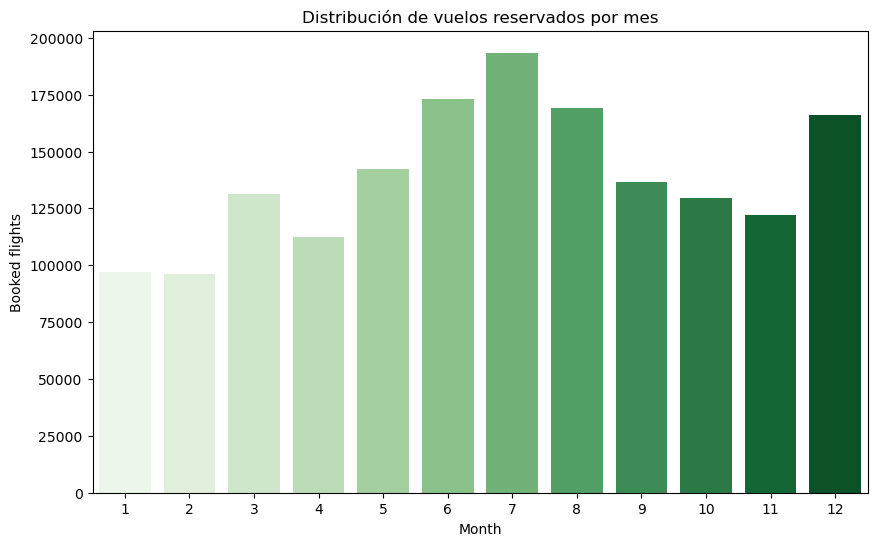

In [44]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año

# Agrupar por mes y sumar los vuelos reservados
monthly_flights = df_cleaned.groupby("Month")["Flights Booked"].sum().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_flights, x="Month", y="Flights Booked", palette= "Greens")

plt.title("Distribución de vuelos reservados por mes")
plt.xlabel("Month")
plt.ylabel("Booked flights")
plt.show()

Agrupo los datos por mes usando groupby("Month"), selecciono la columna de vuelos reservados y sumo con .sum().

Con reset_index() convierto el índice en columna normal para facilitar el gráfico.

Esto me da el total de vuelos reservados por cada mes del año.

Utilizó un barplot porque es un gráfico de barras que va bien para comparar cantidades entre variabless, en este caso los meses.
Permite ver fácilmente en qué meses se concentran más o menos reservas de vuelos.

Conclusión:
Basandome en la gráfica concluyo que en el mes de julio hay mayor cantidad de reservas de vuelo y los que menos reservas enero y febrero



C:\Users\JER\AppData\Local\Temp\ipykernel_688\532037966.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_cleaned, x="Distance", y="Points Accumulated", palette="Blue_d")


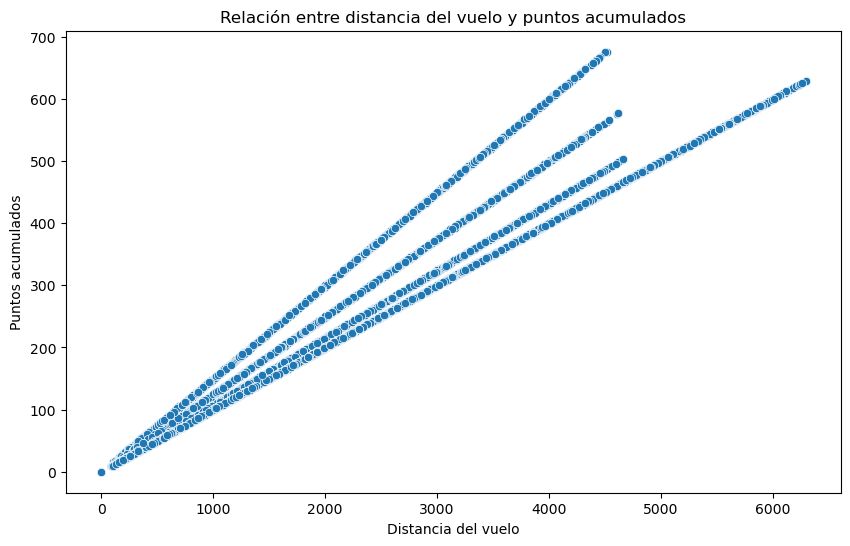

In [45]:
#2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="Distance", y="Points Accumulated", palette="Blue_d")

plt.title("Relación entre distancia del vuelo y puntos acumulados")
plt.xlabel("Distancia del vuelo")
plt.ylabel("Puntos acumulados")
plt.show()

Utilizo un scatter plot porque quiero ver la relación entre dos variables numéricas ("Distance", "Points Accumulated")

Conclusión:
Hay una relación lineal positiva, a mayor distancia del vuelo, más puntos se acumulan.

Tiene sentido porque los programas de fidelidad suelen premiar con puntos proporcionales a la distancia.

In [46]:
#3. ¿Cuál es la distribución de los clientes por provincia o estado?

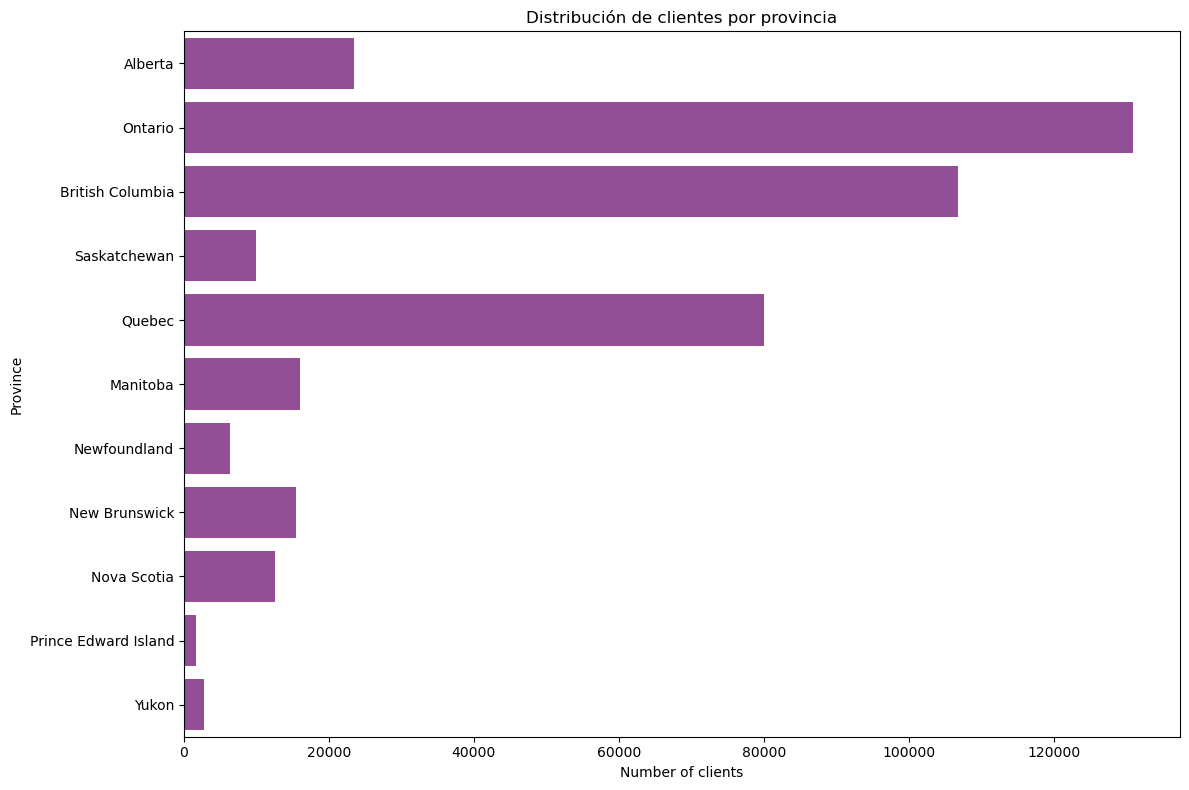

In [47]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_cleaned, y="Province", color = "#9e43a2")

plt.title("Distribución de clientes por provincia")
plt.xlabel("Number of clients")
plt.ylabel("Province")
plt.tight_layout()
plt.show()

Uitlizo countplot porque me va a mostrar la frecuencia de una variable. Province, es decir, cuántos clientes hay en cada una.
Cuando trabajo con una única variable categórica.

Conclusión:
Algunas provincias tienen una mayor concentración de clientes.
Podría reflejar zonas con más viajeros frecuentes o donde la aerolínea tiene más presencia.

In [48]:
#Hago el dtype para ver mis columnas y ver qué tipo de dato son y así elegir mejor la gráfica
df_cleaned.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated               int32
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year                int32
Cancellation Month               int32
dtype: object

C:\Users\JER\AppData\Local\Temp\ipykernel_688\197441951.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=education_salary, x="Salary", y="Education", palette="Purples")


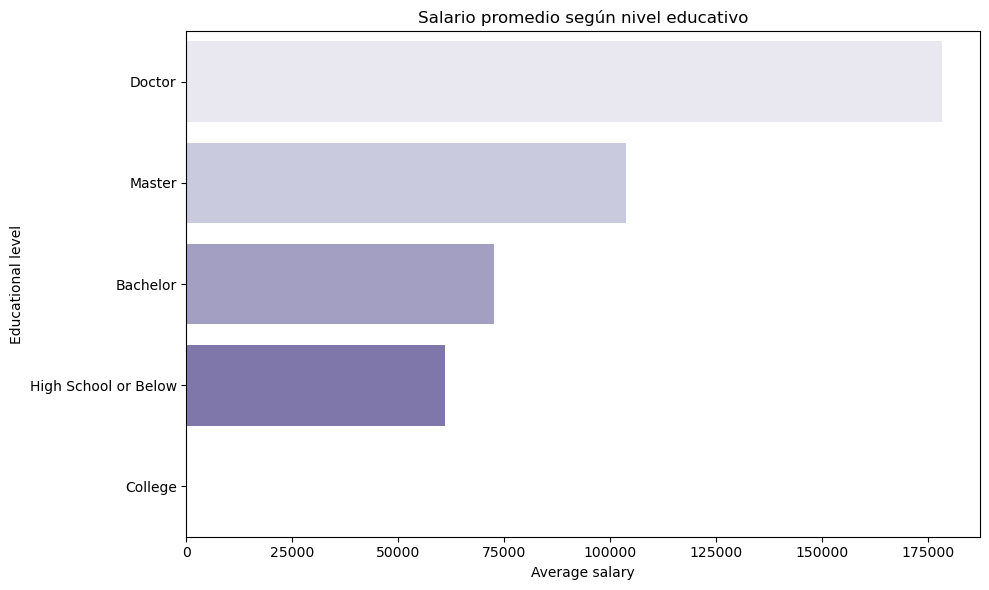

In [49]:
# 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
# Agrupar por nivel educativo y calcular salario promedio
education_salary = df_cleaned.groupby("Education")["Salary"].mean().sort_values(ascending=False).reset_index()

# Crear gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(data=education_salary, x="Salary", y="Education", palette="Purples")

plt.title("Salario promedio según nivel educativo")
plt.xlabel("Average salary")
plt.ylabel("Educational level")
plt.tight_layout()
plt.show()

Este código agrupo los datos por nivel educativo (groupby("Education")), calcula el salario promedio de cada grupo (mean()), 
los ordena de mayor a menor (sort_values()), y uso el reset_index() para pasar el índice de nuevo a una columna normal, hacer que el DataFrame quede bien estructurado para crear la gráfica.

Así obtenemos una tabla limpia para comparar salarios promedio por educación.

Como quiero comparar promedio entre categorías, utilizo barplot() que es ideal cuando se trata de medias. Salary es númerica y education es categórica, por eso uso barplot ya que permite relacionarlas.

Conclusión:
El gráfico muestra que a mayor nivel educativo, mayor es el salario promedio. Es una relación clara que refleja cómo la educación impacta directamente en el ingreso económico de los clientes. Observo que College esta sin registros, quizá porque hay muy pocos registros, o porque son ceros.


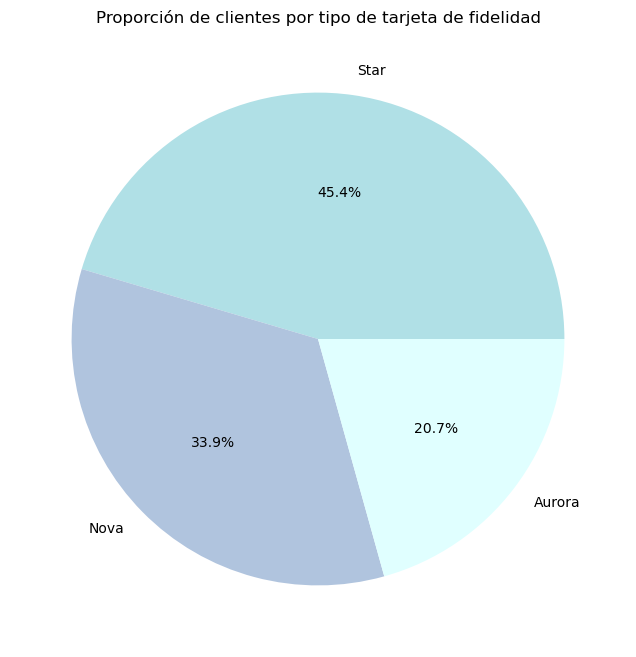

In [50]:
# 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

# Contar clientes por tipo de tarjeta de fidelidad
card_counts = df_cleaned["Loyalty Card"].value_counts()

# Crear gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    card_counts,
    labels=card_counts.index,
    autopct="%1.1f%%",  # Mostrar porcentaje con 1 decimal
    colors = ['powderblue', 'lightsteelblue', 'lightcyan']
)
plt.title("Proporción de clientes por tipo de tarjeta de fidelidad")
plt.show()

Para poder contestar a esta pregunta he utilizado la columna "Loyalty Card" porque habla de categorías, a diferencia de "Loyalty Number" que habla de identificadores.

Utilizo un pie chart porque quiero mostrar la proporción de clientes según su tipo de tarjeta de fidelidad.

Conclusión:
Un tipo de tarjeta es claramente más popular que los demás. En este caso es 'Star', seguido por 'Nova', mientras que 'Aurora' es la menos común.

Esto indica que 'Star' es la más popular o accesible, 'Nova' podría representar un nivel intermedio, y 'Aurora', un nivel más exclusivo, disponible para un número más reducido de clientes.

In [51]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

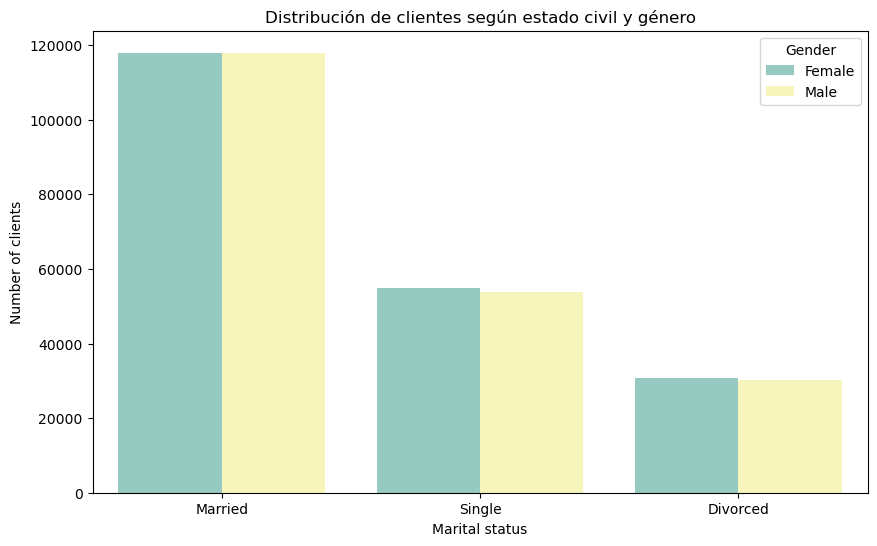

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x="Marital Status", hue="Gender", palette="Set3")

plt.title("Distribución de clientes según estado civil y género")
plt.xlabel("Marital status")
plt.ylabel("Number of clients")
plt.legend(title="Gender")
plt.show()

Para poder contestar a esta pregunta he utilizado la columna "Marital Status" y "Gender".

He countplot porque quiero contar cuántos clientes hay en cada categoría de estado civil, separados por género.
El argumento hue="Gender" permite comparar la distribución entre hombres y mujeres dentro de cada grupo de estado civil.


Conclusión:
Puedo oberservar que el grupo más numeroso es el de clientes casados. En casi todos los estados civiles, hay una distribución muy equilibrada entre hombres y mujeres.

BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

1.Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'

In [53]:
df_bonus = df_cleaned[['Flights Booked', 'Education']]

df_bonus

,Flights Booked,Education
0,3,Bachelor
1,2,Bachelor
2,6,Bachelor
3,4,Bachelor
4,0,Bachelor
...,...,...
405619,15,Bachelor
405620,0,Bachelor
405621,6,Bachelor
405622,11,Bachelor


Creo un nuevo df_bonus extrayendo las columnas "Flights Booked" y "Education" de mi df_cleaned. Utilizo doble corchete para pasar una lista de columnas y, al separarlas por comas, indicamos que queremos extraer múltiples columnas del DataFrame.

2.Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada grupo.

In [ ]:

description = df_bonus.groupby('Education')['Flights Booked'].agg(['mean', 'std', 'count'])


description

Con este código agrupo mi df_bonus por nivel de educación y, para cada grupo, calcula el promedio (mean), la desviación estándar (std) y la cantidad de registros (count) de la columna "Flights Booked".Así puedo saber cómo son los vuelos reservados en función del nivel educativo.